### Implementation

Here we implement the Artin Zeta Function for irreducible polynomials over finite fields.
See references for a theoretical explanation.

In [3]:
def legendre_poly(D, P):
    ###Returns the Legendre symbol [D/P] when P is a prime polynomial
        if P.divides(D):
            return 0
        else:
            OP = R.quotient_by_principal_ideal(P, 'X')
            squares = Set([M^2 for M in OP])
            if OP(D) in squares:
                return 1
            else:
                return -1

def jacobi_poly(D,Q): ###Returns the Jacobi symbol [D/Q] for general Q
    z=list(Q.factor())
    r=[]
    #r.append(len(z))
    for i in range(0,len(z)):
        r.append(legendre_poly(D,z[i][0])^(z[i][1]))
    return prod(r)

def sigma(D,v): ###Returns the value of the coefficient sigma_v
    sig=[]
    for p in R.monics( of_degree = v ):
        sig.append(jacobi_poly(D,p))
    return sum(sig)


def zeta_artin(D): ###Returns an array [sigma_0,sigma_1,...,sigma_(n-1)]
                   ###for the Artin zeta function of the curve y^2=D(z)
    n=D.degree()
    f=D.coefficients()[0]
    m=(n-1)/2
    t=n/2
    sigm=[]
    squares = Set([M^2 for M in F])
    if is_odd(n):
        for i in range(0,m+1):
            sigm.append(sigma(D,i))
        for j in range(1,m+1):
            sigm.append((q^j)*sigm[m-j])
        return(sigm)
    else:
        if f in squares: ##Real case
            for i in range(0,t):
                sigm.append(sigma(D,i))
            for j in range(0,t-1):
                sigm.append((q^j)*(-sigm[t-j-1] +(q-1)*(sum([sigm[k] for k in range(0,t-j-1)]))))
            sigm.append(-q^(t-1))
            return(sigm)
        else: ##Imaginary case
            for i in range(0,t):
                sigm.append(sigma(D,i))
            for j in range(0,t-1):
                sigm.append((q^j)*(sigm[t-j-1] +(q-1)*(sum([sigm[k]*(-1)^(t-j-k) for k in range(0,t-j-1)]))))
            sigm.append(q^(t-1))
            return(sigm)

### Examples

We apply the Artin Zeta function calculations to some irreducible polynomials in finite fields. In the following level curve plots we can see the (Finite Fields) Riemann Hypothesis in action.

In [4]:
q=3
F = GF(q)
R.<x> = F[]

#### Example 1.

In [5]:
D3= x^3+2*x^2+x+1
print(f"This polynomial is irreducible: {D3.is_irreducible()}.")
show(D3)
print(f"Coefficients of Artin's Zeta Function: {zeta_artin(D3)}.")

This polynomial is irreducible: True.


x^3 + 2*x^2 + x + 1

Coefficients of Artin's Zeta Function: [1, 1, 3].


In this case the coefficients are $1,2,3$, therefore Artin's function is:

$$Z_F(s)=\frac{1}{1-3^{1-s}} (1+3^{-s}+3\cdot 3^{-2s} ).$$

The complex plot of such function follows.

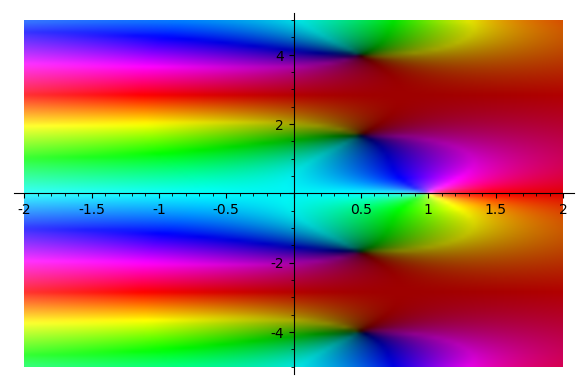

In [6]:
complex_plot(lambda z: (1 +(3^(-z))+ 3*(3^(-2*z)))/(1-3^(1-z)), (-2, 2), (-5, 5))

#### Example 2.

In [7]:
D5= x^5+2*x^4+2*x^2+2*x+1
print(f"This polynomial is irreducible: {D5.is_irreducible()}.")
show(D5)
print(f"Coefficients of Artin's Zeta Function: {zeta_artin(D5)}.")

This polynomial is irreducible: True.


x^5 + 2*x^4 + 2*x^2 + 2*x + 1

Coefficients of Artin's Zeta Function: [1, -1, 5, -3, 9].


In this case  Artin's function is:

$$Z_F(s)=\frac{1}{1-3^{1-s}} (1-3^{-s}+5\cdot 3^{-2s} -3 \cdot 3^{-3s} +9 \cdot 3^{-4s} ).$$

The complex plot of such function follows.

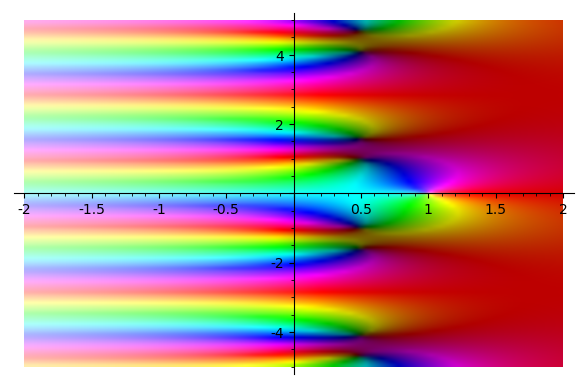

In [8]:
complex_plot(lambda z: (1 -(3^(-z))+ 5*(3^(-2*z)) -3*(3^(-3*z)) +9*(3^(-4*z)) )/(1-3^(1-z)), (-2, 2), (-5, 5))

Nice: All zeroes are in the $\text{Re}(z)=\frac{1}{2}$ line !

#### Example 3. (Real Case)

This is what Artin calls the "real case" (reel fälle). In this case $0$ will be a root of the zeta function or, equivalently, the sum of the coefficients $sigma_v$ is equal to zero.

In [9]:
D10=x^10+x^3+x^2+1
print(f"This polynomial is irreducible: {D10.is_irreducible()}.")
show(D10)
print(f"Coefficients of Artin's Zeta Function: {zeta_artin(D10)}.")

This polynomial is irreducible: True.


x^10 + x^3 + x^2 + 1

Coefficients of Artin's Zeta Function: [1, 1, 3, 5, 5, 15, 15, 9, 27, -81].


In this case  Artin's function is:

$$Z_F(s)=\frac{1}{1-3^{1-s}} (1+3^{-s} +3\cdot 3^{-2s} + 5 \cdot 3^{-3s} + 5 \cdot 3^{-4s} + 15 \cdot 3^{-5s} + 15 \cdot 3^{-6s} + 9 \cdot 3^{-7s} + 27 \cdot 3^{-8s}  -81 \cdot 3^{-9s}).$$

The complex plot of such function follows.

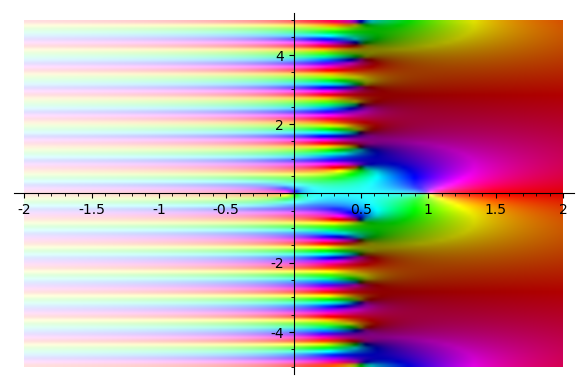

In [10]:
complex_plot(lambda z: (1 +(3^(-z))+ 3*(3^(-2*z)) +5*(3^(-3*z)) +5*(3^(-4*z)) +15*(3^(-5*z)) +15*(3^(-6*z)) + 9*(3^(-7*z)) +27*(3^(-8*z)) -81*(3^(-9*z)) )/(1-3^(1-z)), (-2, 2), (-5, 5))

### 3D Examples

To plot in 3d we take the absolute value of the function $Z_F(u)$, with the change of coordinates $u=q^{-s}$. Please note that these ARE NOT the plots of the absolute values of the functions above, because of the change of variables. However we can note the presence of a pole in $u=1/q$ (which is s=1).

$$Z_F(u)= \frac{1}{1-3u}\cdot(1+u+3u^2).$$
Zeta function for the curve $$y^2=x^3+2x^2+x+1$$

In [12]:
var('x y');
p3=plot3d(lambda x,y:abs((1+(x+I*y)+3*(x+I*y)^2)/(1-3*(x+I*y))),(x,-2,2),(y,-2,2),adaptive=True, color=rainbow(60, 'rgbtuple'), max_bend=.1, max_depth=15)
p3.show(aspect_ratio=(3,3,1))

Graphics3d Object

$$Z_F(u)= \frac{1}{1-3u}\cdot(1-u+5u^2-3u^3+9u^4).$$
Zeta function for the curve $$y^2=x^5+2x^4+2x^2+2x+1$$

In [13]:
var('x y');
p5=plot3d(lambda x,y:abs((1-(x+I*y)+5*(x+I*y)^2 -3*(x+I*y)^3 +9*(x+I*y)^4)/(1-3*(x+I*y))),(x,-1,1),(y,-1,1),adaptive=True, color=rainbow(60, 'rgbtuple'), max_bend=.1, max_depth=15)
p5.show(aspect_ratio=(4,4,1))

Graphics3d Object

$$Z_F(u)= \frac{1}{1-3u}\cdot(1+u+3u^2-u^3+9u^4+9u^5+27u^6).$$
Zeta function for the curve $$y^2=x^7+x^6+2x^5+x^4+2x+1$$

In [14]:
var('x y');
p7=plot3d(lambda x,y:abs((1+(x+I*y)+3*(x+I*y)^2 -1*(x+I*y)^3 +9*(x+I*y)^4  +9*(x+I*y)^5 +27*(x+I*y)^6)/(1-3*(x+I*y))),(x,-0.7,0.7),(y,-0.7,0.7),adaptive=True, color=rainbow(60, 'rgbtuple'), max_bend=.1, max_depth=15)
p7.show(aspect_ratio=(7,7,1))

Graphics3d Object